In [1]:
# il perchè di queste analisi: 
# confermare la supposizione che ci sia un costo di movimento per prendere la cassa successiva che vada acrescere ogni volta che prendo una cassa in un'area, 
#e che quindi convenga uscire a una certa

# questa supposizione nasce dal fatto che quando secondo l'OFT (senza considerare ancora costo di movimento e tempo) i sogg. dovrebbero prendere tutte le casse (5) e poi uscire, 
# i sogg. tendono a prendere 3/4 casse soltanto 


# come si vede più avanti in questo file questa supposizione non è confermata dai dati - non costa di più, in termini di costo di movimento (e dunque, in questo esperimento, di tempo) prendere la 5 cassa pittosto che la 2, ad esempio

In [2]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy


In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [4]:
data = pd.read_csv('out/results.csv')  # read data

In [5]:
# mi creo delle variabili che contengono i valori delle colonne che mi servono dentro data
firstbox_timetotake = data["FirstBoxTimeToTake"]
secondbox_timetotake = data["SecondBoxTimeToTake"]
thirdbox_timetotake = data["ThirdBoxTimeToTake"]
fourthbox_timetotake = data["FourthBoxTimeToTake"]
fifthbox_timetotake = data["FifthBoxTimeToTake"]
exitandtakefirstboxsecondarea_timetotake = data["TimeToExitFirstAreaAndTakeABoxInTheSecond"]


In [9]:
firstbox_timetotake_mean = firstbox_timetotake.mean()
secondbox_timetotake_mean = secondbox_timetotake.mean()
thirdbox_timetotake_mean = thirdbox_timetotake.mean()
fourthbox_timetotake_mean = fourthbox_timetotake.mean()
fifthbox_timetotake_mean = fifthbox_timetotake.mean()
exitandtakefirstboxsecondarea_timetotake_mean = exitandtakefirstboxsecondarea_timetotake.mean()

firstbox_timetotake_mean
exitandtakefirstboxsecondarea_timetotake_mean

5.933870967741935

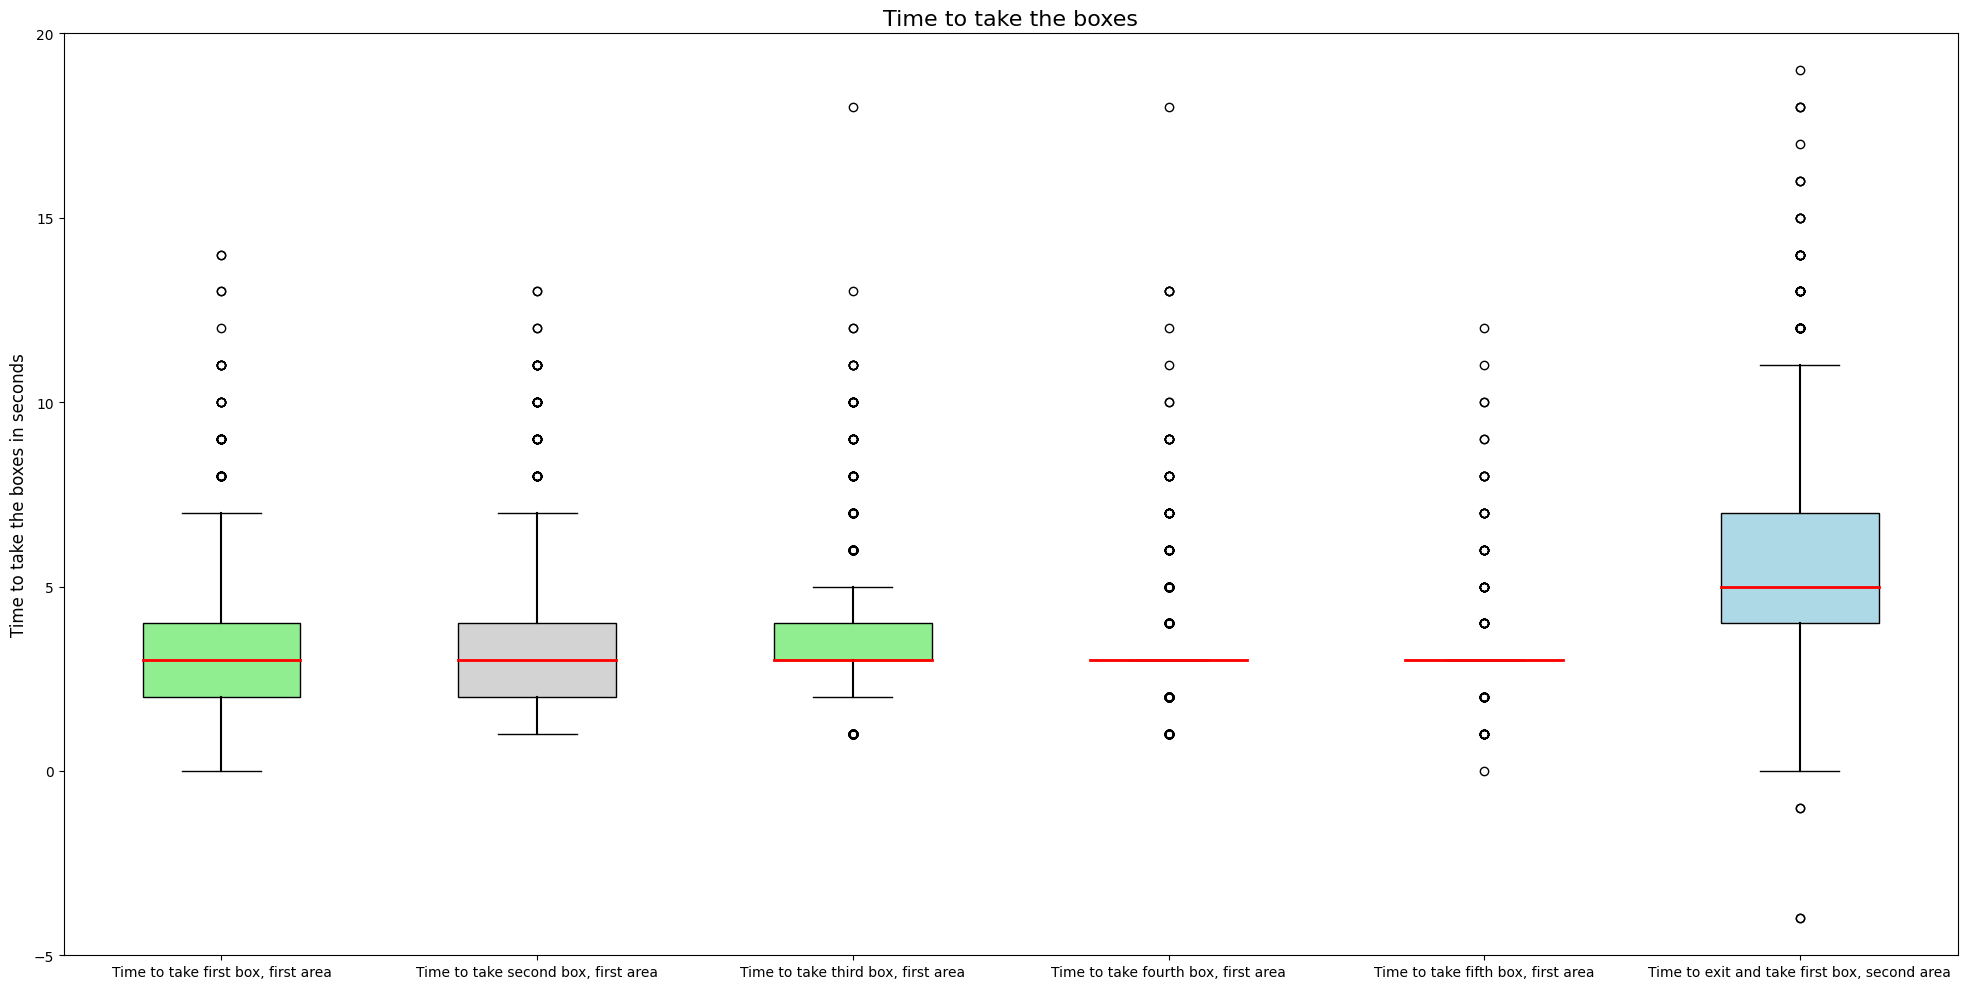

In [7]:
data = [firstbox_timetotake, secondbox_timetotake, thirdbox_timetotake,fourthbox_timetotake,fifthbox_timetotake, exitandtakefirstboxsecondarea_timetotake]

# Remove NaN values
data_without_nan = [np.nan_to_num(arr, nan=np.nanmedian(arr)) for arr in data]


plt.figure(figsize=(20, 10))


box = plt.boxplot(data_without_nan, labels=[
    "Time to take first box, first area",
    "Time to take second box, first area",
    "Time to take third box, first area",
    "Time to take fourth box, first area",
    "Time to take fifth box, first area",
    "Time to exit and take first box, second area"
], patch_artist=True)  # Utilizzo patch_artist per riempire i box

# Modifico lo stile dei box e dei baffi
colors = ['lightgreen', 'lightgray', 'lightgreen', "lightgreen", "lightgreen", "lightblue"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)



# Voglio le mediane rosse
for median in box['medians']:
    median.set(color='red', linewidth=2)

plt.title("Time to take the boxes", fontsize=16)
plt.ylabel('Time to take the boxes in seconds', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylim(-5, 20) # setto i valori sull'asse delle y 

 

plt.tight_layout()
plt.show()

